### BURADA SADECE GRAF GÖRSELLEŞTİRME İŞLEMİNE YER VERİLMİŞTİR

#### KÜTÜPHANELERİN IMPORT EDİLMESİ

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import torch
import torch.nn as nn
from itertools import combinations

#### VERİSETİ ANONİM OLDUĞUNDAN BURADA ÖRNEK OLMASI AÇISINDAN ÖRNEK VERİLERLE BİR GRAF OLUŞTURDUM:

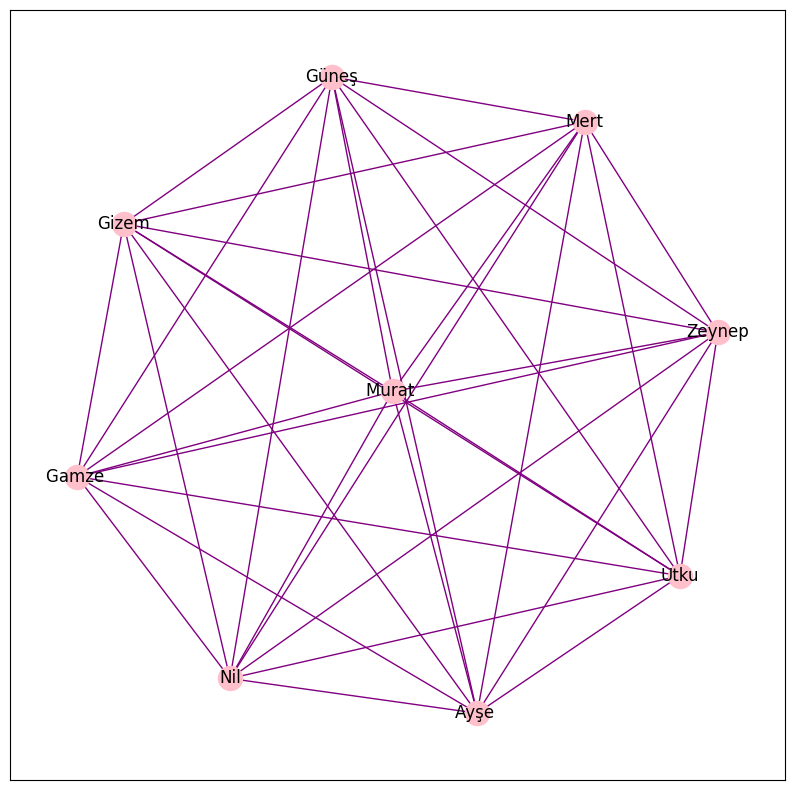

In [2]:
#ikili kombinasyonlar için fonksiyon tanımladım
def iliski_kombinasyonu(input_list):
    kombinasyon_list = list(combinations(input_list, 2))
    return kombinasyon_list

grup_1 = ['Gamze ',
          'Murat ',
          'Ayşe ',
          'Güneş',
          'Zeynep',
          'Mert',
          'Gizem',
          'Utku',
          'Nil']

grup_2 = ['Gamze ',
          'Ayşe ',
          'Emir',
          'Sude',
          'Güler']


grup_1_komb_list = iliski_kombinasyonu(grup_1)
grup_2_komb_list = iliski_kombinasyonu(grup_2)


#iki listenin birleştirilmesi ve aynı olmaması şartının kontrolü
iliskiler_list = grup_1_komb_list + grup_1_komb_list
iliskiler_list = [b for b in iliskiler_list if b[0] != b[1]]

G_symmetric = nx.Graph()

#ilişkiler arasına edge ekleme
for iliski in iliskiler_list:
    G_symmetric.add_edge(iliski[0], iliski[1])


#graf yapısını görselleştirme
fig = plt.figure(figsize=(10, 10))
nx.draw_networkx(G_symmetric , node_color='pink', edge_color='purple')
plt.show()


#### PROJEDE KULLANDIĞIM VERİSETİNİN 2D GRAF GÖRSELİ

Index(['source', 'target'], dtype='object')


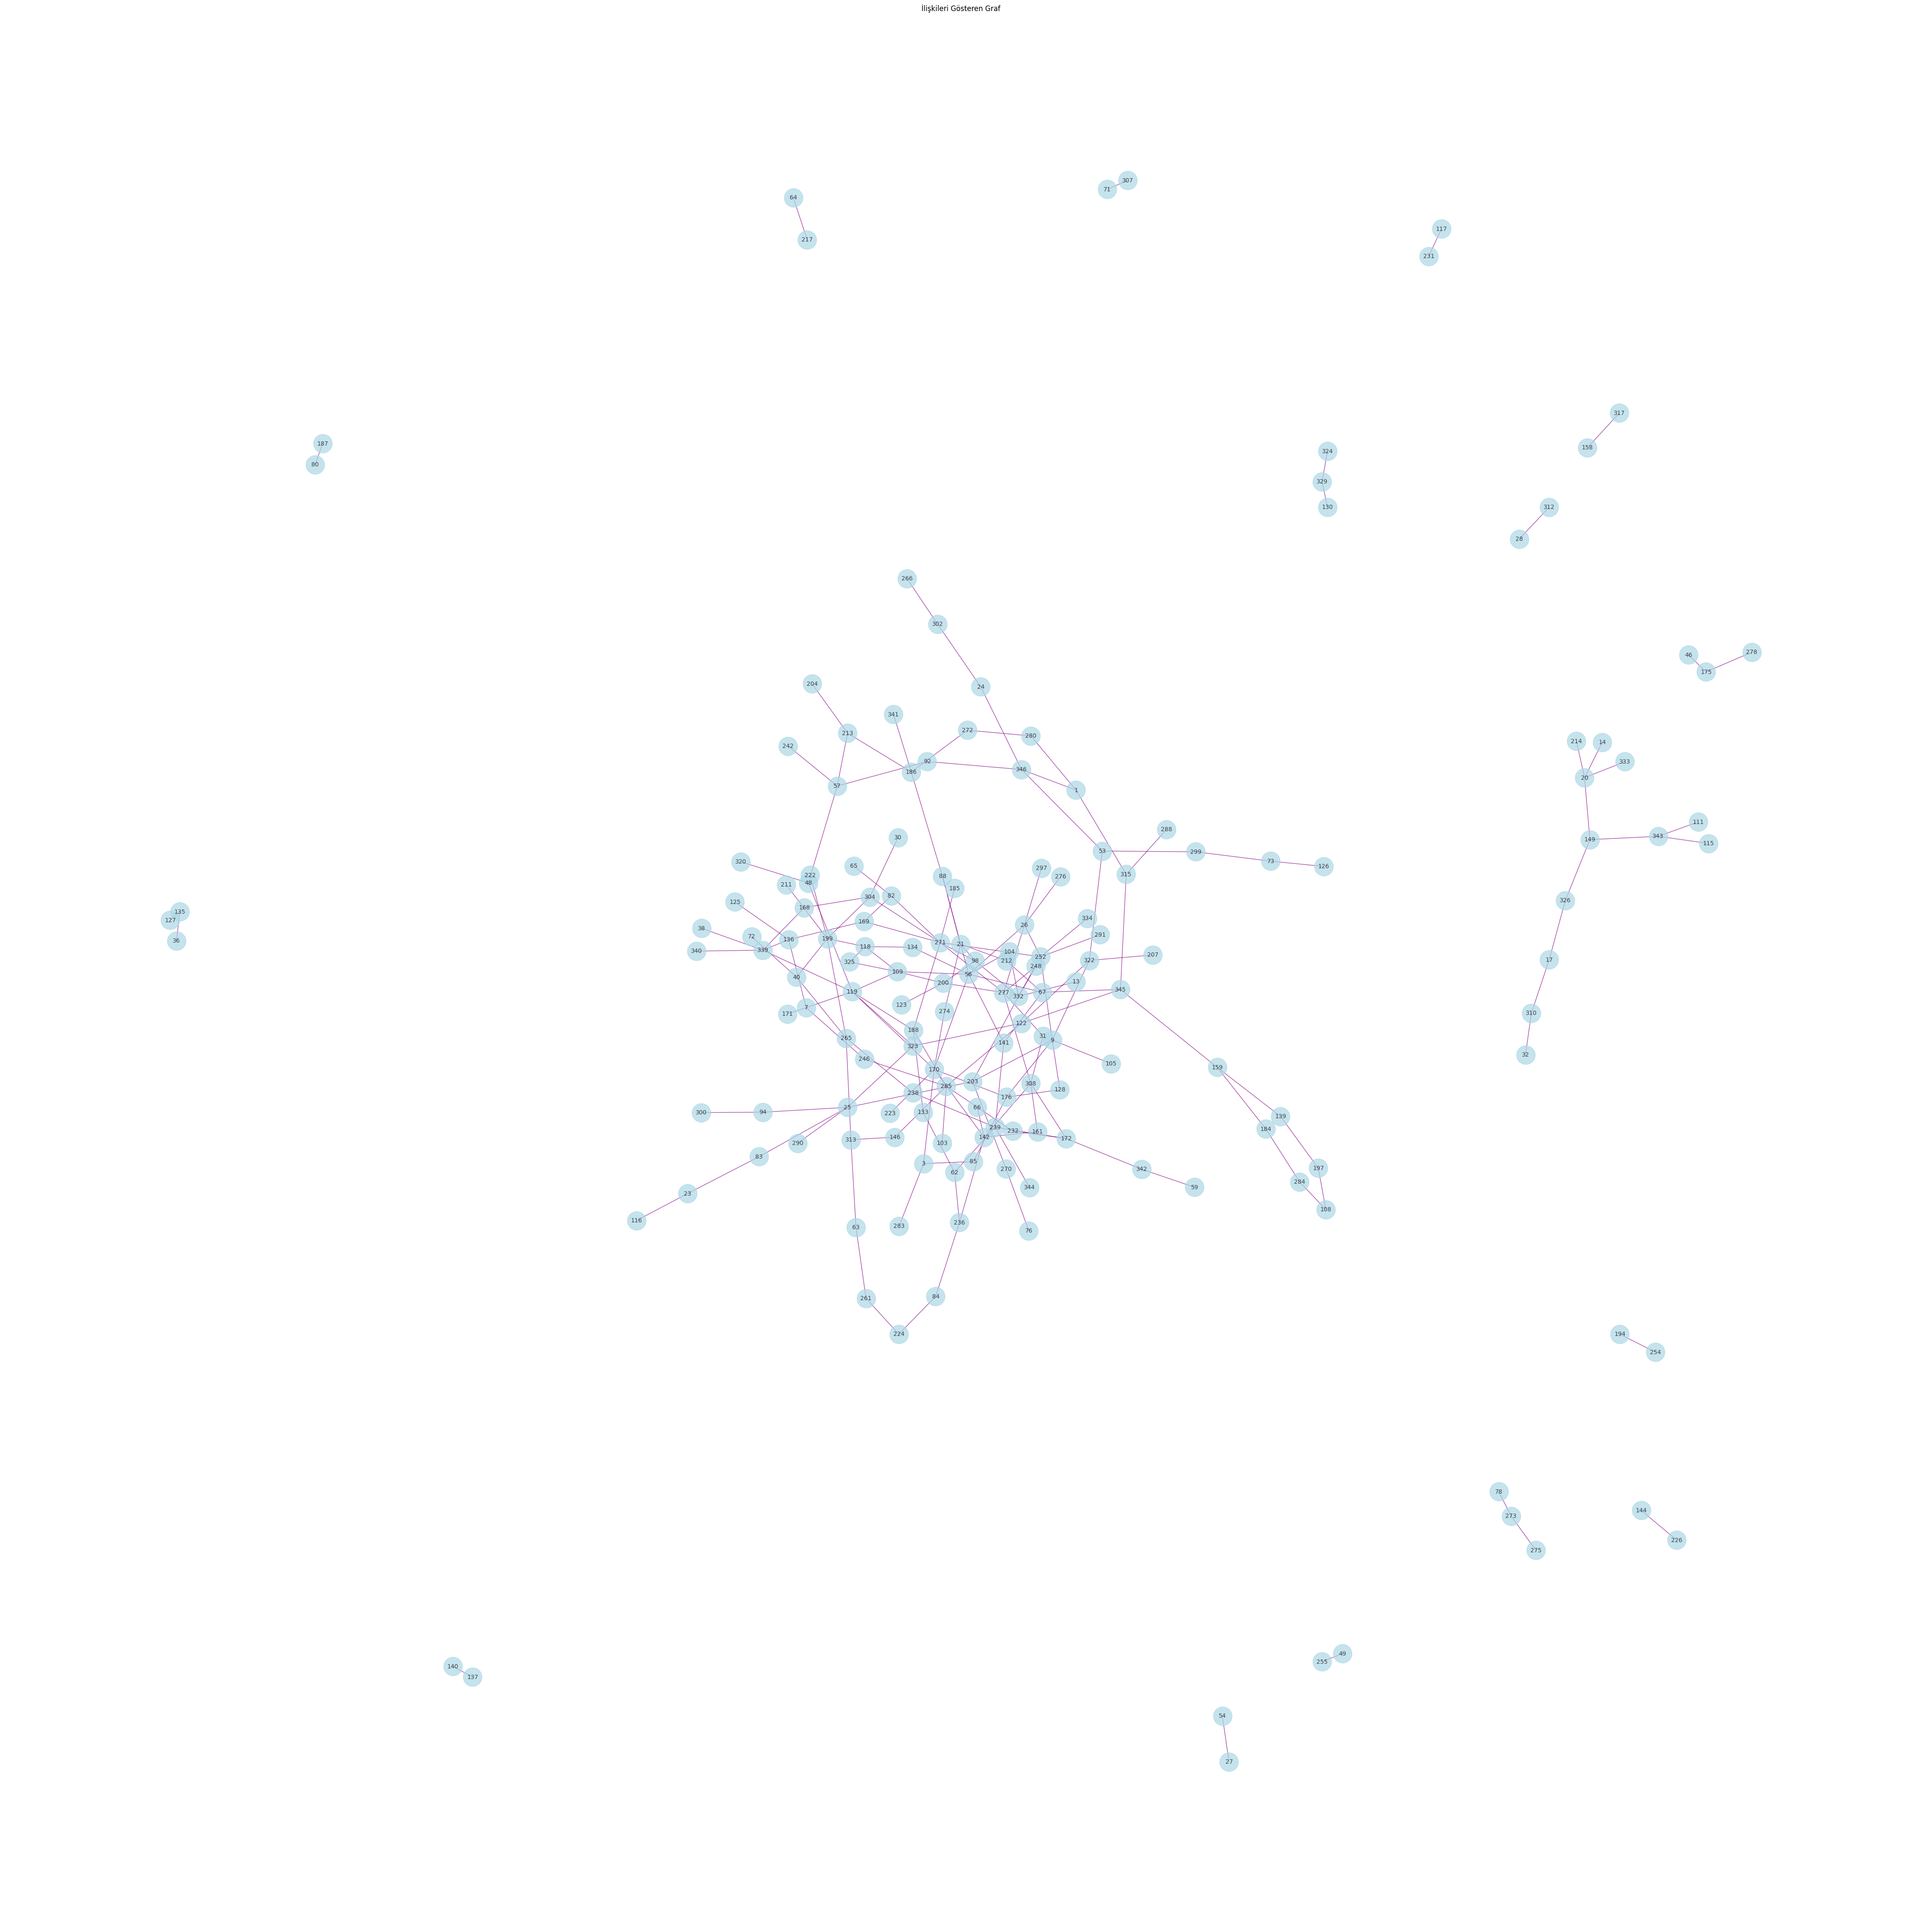

In [3]:
df = pd.read_excel('veri.xlsx')
df.columns = ['source', 'target']
df = df[:200] #graf'ı görselleştirirken ilişkilerin daha net görünmesi için tüm verileri almadım
print(df.columns)
G = nx.Graph()

edges = df.values.tolist()

#liste haline getirilen ikililerin ilişkilerinin eklenmesi
G.add_edges_from(edges)


#graf yapısının görselleştirilmesi
plt.figure(figsize=(45, 45))
pos = nx.spring_layout(G) # düğümlerin konumlarının belirlenmesi
nx.draw(G, pos, with_labels=True, node_size=1000, font_size=10, node_color='lightblue', edge_color='purple', alpha=0.7)
plt.title('İlişkileri Gösteren Graf')
plt.show()

#### 3D GRAF GÖRSELİ

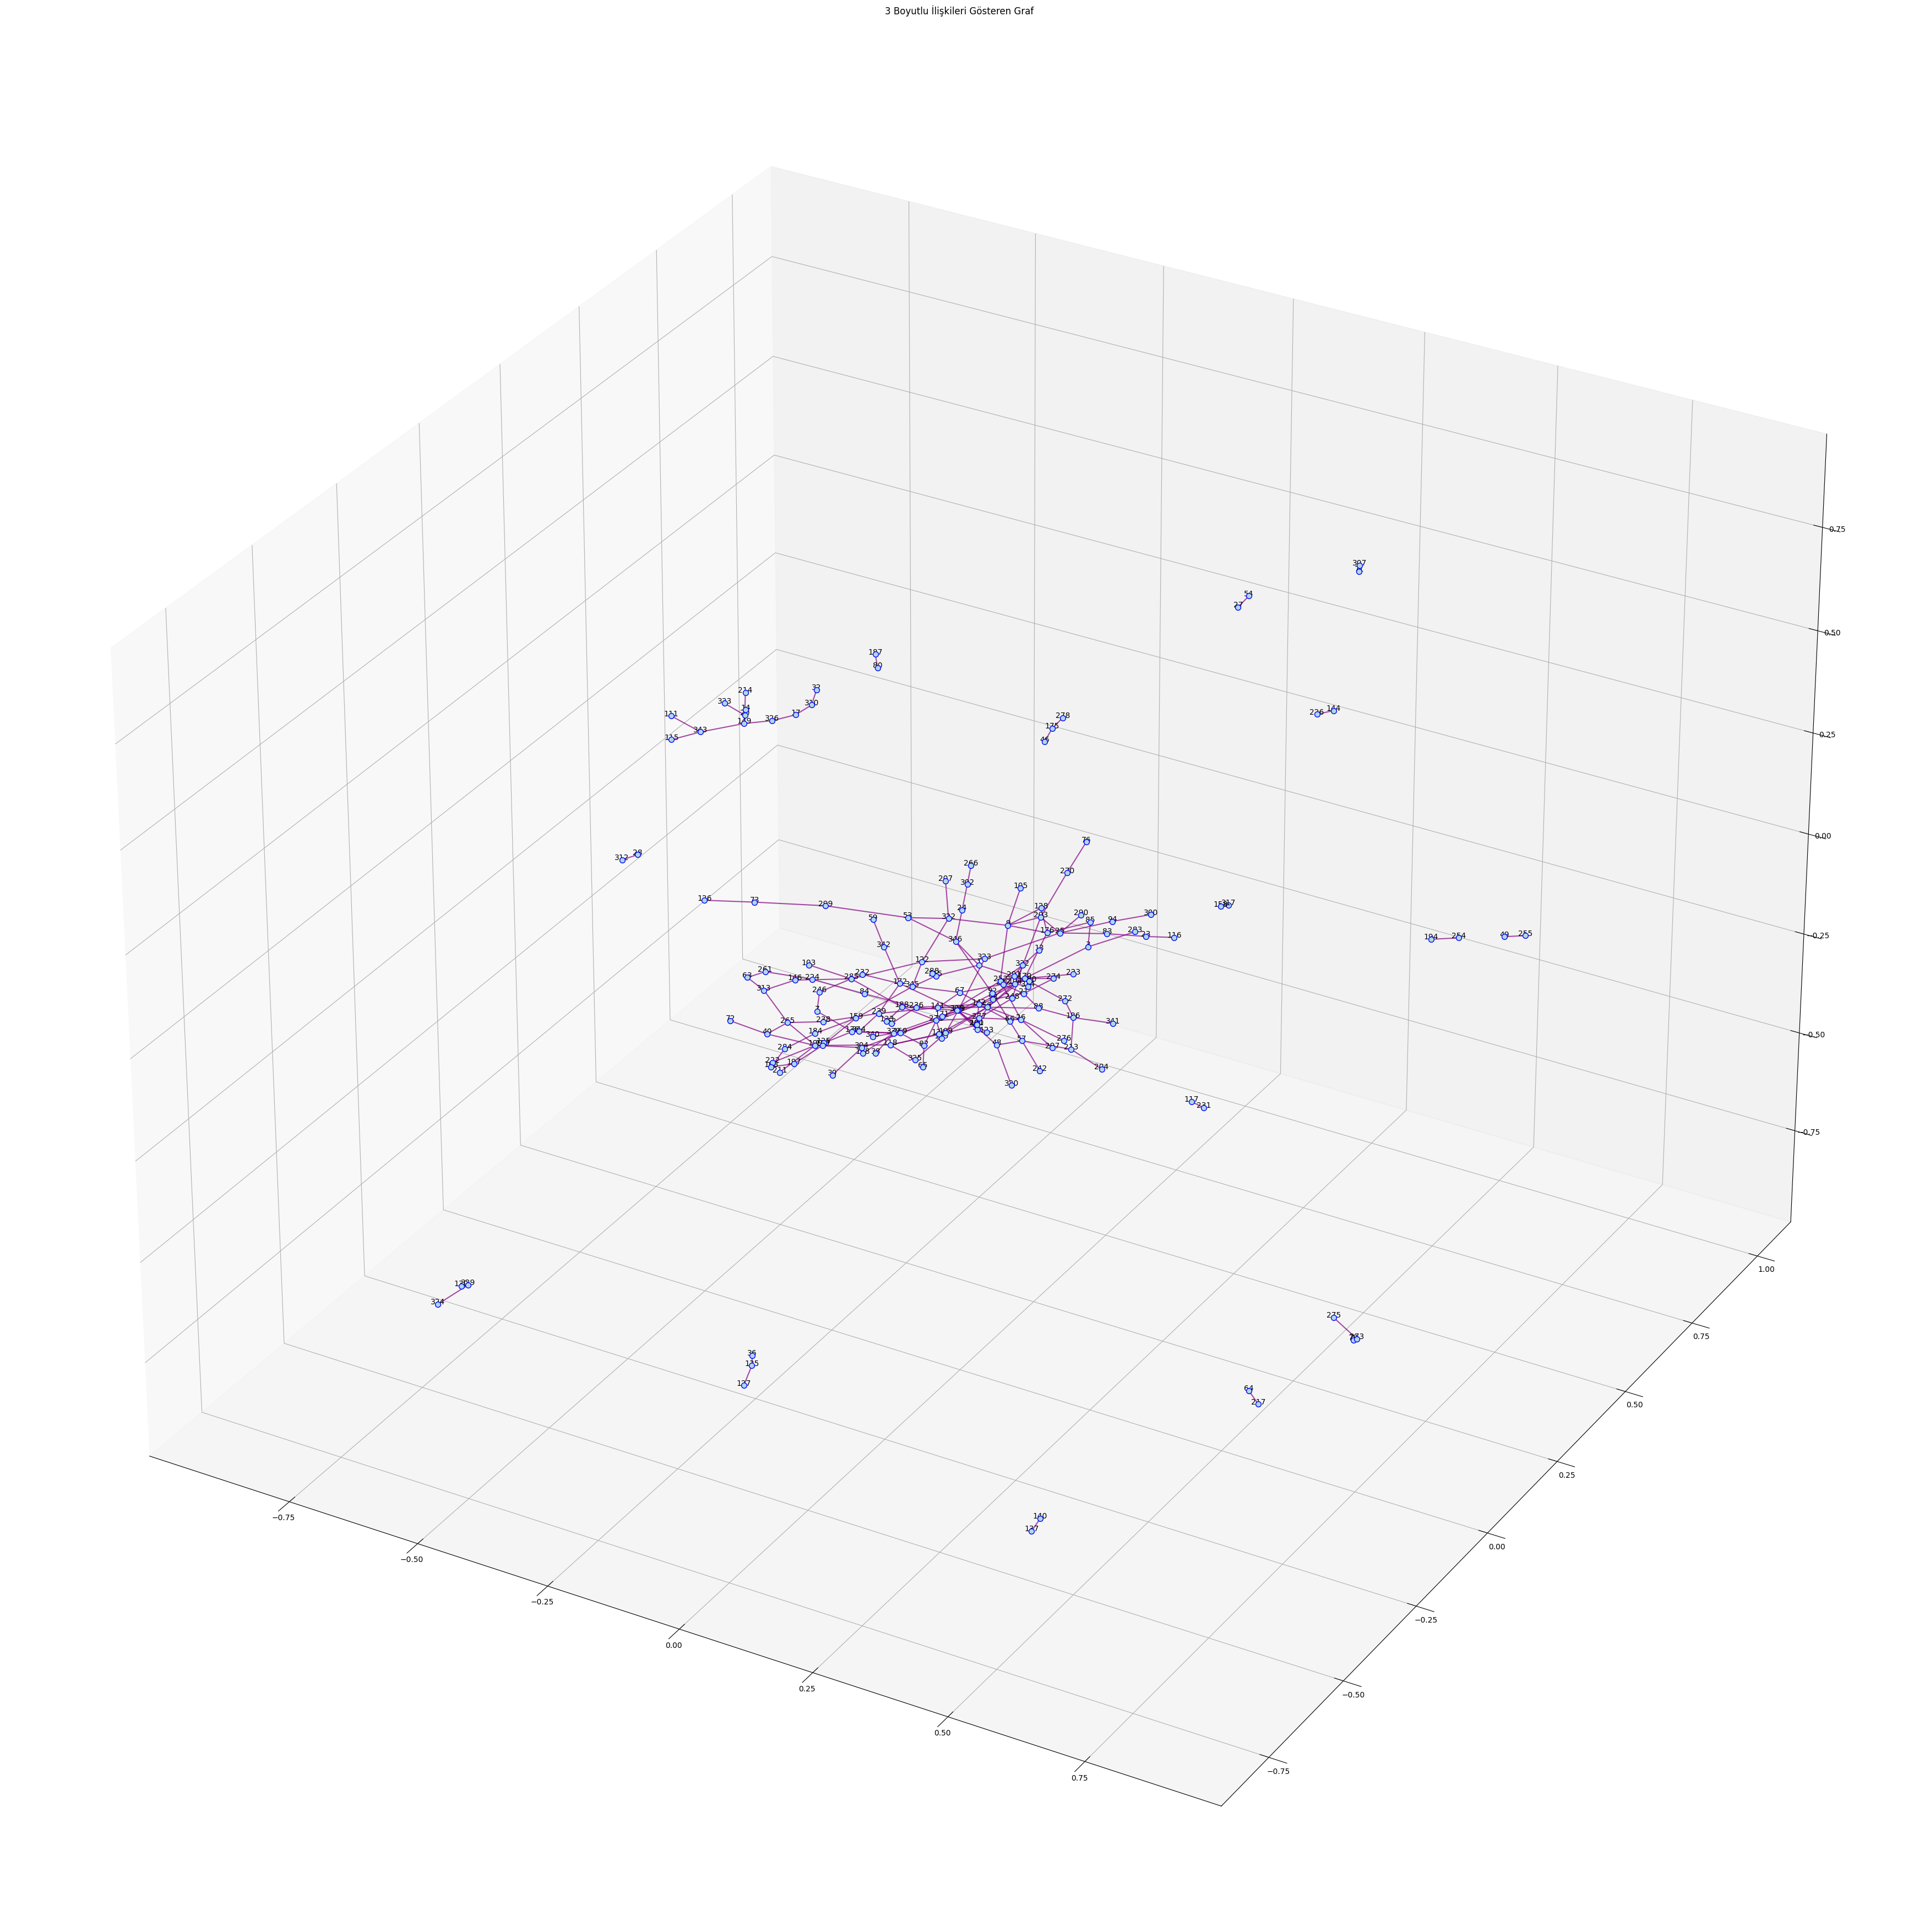

In [8]:

# Düğümlerin üç boyutlu konumlarını belirle
pos = nx.spring_layout(G, dim=3)

# 3 boyutlu grafik oluştur
fig = plt.figure(figsize=(45, 45))

ax = fig.add_subplot(111, projection='3d')

# Düğümleri çiz
for node, (x, y, z) in pos.items():
    ax.scatter(x, y, z, s=50, color='lightblue', edgecolors='blue')
    ax.text(x, y, z, node, fontsize=10, ha='center')

# Kenarları çiz
for u, v in G.edges():
    x = [pos[u][0], pos[v][0]]
    y = [pos[u][1], pos[v][1]]
    z = [pos[u][2], pos[v][2]]
    ax.plot(x, y, z, color='purple', alpha=0.7)

ax.set_title('3 Boyutlu İlişkileri Gösteren Graf')
plt.show()


#### PLOTLY İLE ETKİLEŞİMLİ GRAF GÖRSELİ

In [5]:
import pandas as pd
import networkx as nx
import plotly.graph_objs as go

# Veriyi yükleyin
df = pd.read_excel('veri.xlsx')
df.columns = ['source', 'target']
df = df[:200]  # Görselleştirme için 200 satır alın

# Graf yapısını oluşturun
G = nx.Graph()
edges = df.values.tolist()
G.add_edges_from(edges)

# Düğümlerin konumlarını belirleyin
pos = nx.spring_layout(G)

# Düğümler ve kenarlar için pozisyonları ayrı ayrı alın
edge_trace = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_trace.append(go.Scatter(
        x=[x0, x1, None],
        y=[y0, y1, None],
        line=dict(width=1, color='purple'),
        hoverinfo='none',
        mode='lines'))

node_trace = go.Scatter(
    x=[],
    y=[],
    text=[],
    mode='markers+text',
    textposition="bottom center",
    hoverinfo='text',
    marker=dict(
        showscale=True,
        colorscale='YlGnBu',
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        )
    )
)

# Düğümler için pozisyonları ve metinleri ekleyin
for node in G.nodes():
    x, y = pos[node]
    node_trace['x'] += tuple([x])
    node_trace['y'] += tuple([y])
    node_trace['text'] += tuple([node])

# İnteraktif grafı oluşturun
fig = go.Figure(data=edge_trace + [node_trace],
                layout=go.Layout(
                    title='<br>İlişkileri Gösteren İnteraktif Graf',
                    titlefont_size=16,
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=100,l=50,r=50,t=100),
                    xaxis=dict(showgrid=False, zeroline=False),
                    yaxis=dict(showgrid=False, zeroline=False))
                )

fig.show()
